In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Use load_breast_cancer to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['target'] = load_breast_cancer()['target']

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [5]:
# Display first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Create a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

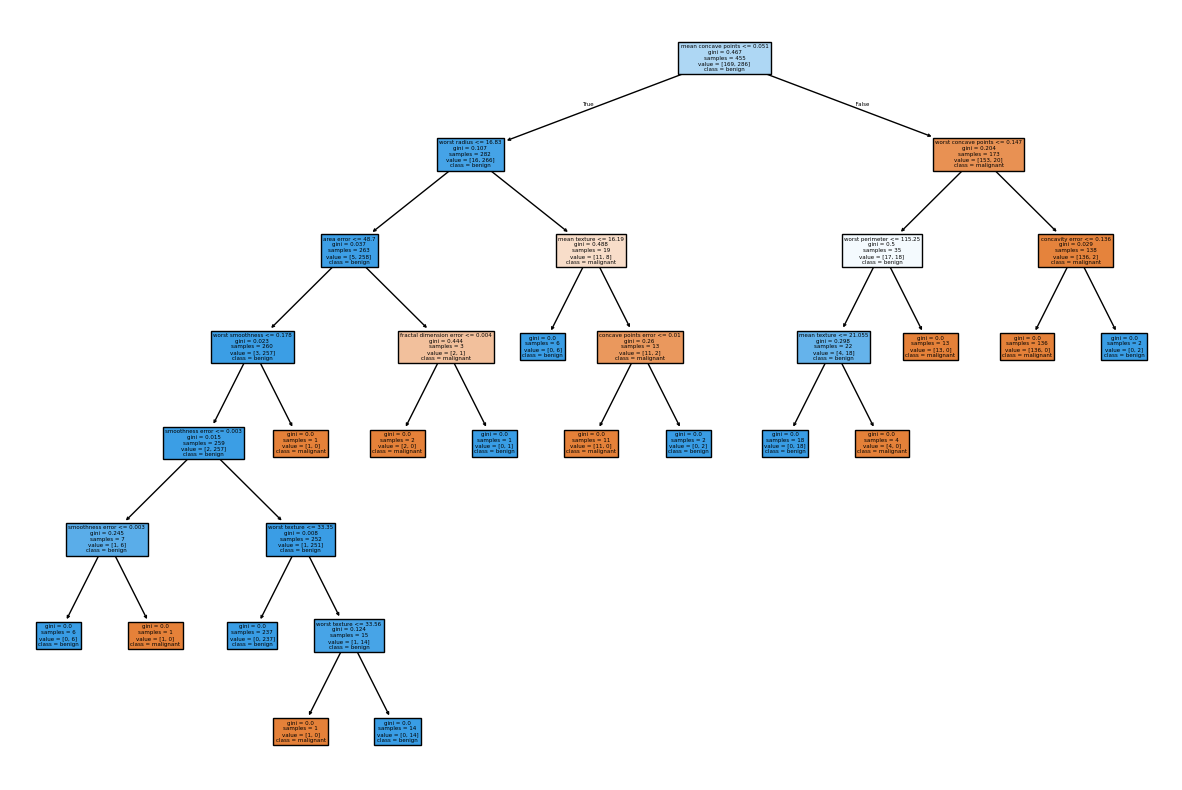

In [7]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['malignant', 'benign'])
plt.show()

In [8]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Extract feature importances
importances = rf.feature_importances_

In [13]:
# Print the feature importances from largest to smallest.
for importance, name in sorted(zip(importances, X_train.columns), reverse=True):
    print(f'{name}: {importance}')

worst perimeter: 0.13863623627884325
worst concave points: 0.1352349869655695
mean concave points: 0.1136866746044005
worst area: 0.10973615728009112
worst radius: 0.09865478231125598
mean concavity: 0.06517079313764389
mean area: 0.06050622401733053
area error: 0.02822262980542171
worst concavity: 0.027383419875550458
mean perimeter: 0.02620993585413292
worst texture: 0.02280915762773625
mean radius: 0.022731146753323408
mean texture: 0.017194902711212677
worst symmetry: 0.015585641484468225
radius error: 0.014599908007165418
mean compactness: 0.014511304200608352
worst smoothness: 0.011498993216179915
perimeter error: 0.00994847189641746
worst compactness: 0.008363087774974317
concavity error: 0.007270075062464956
mean smoothness: 0.006524171946535974
compactness error: 0.00635896877102787
symmetry error: 0.006220783792616589
fractal dimension error: 0.005554820395151706
texture error: 0.00544133227945429
smoothness error: 0.005043532418415096
mean fractal dimension: 0.00484647036905

In [15]:
# Build and train an AdaBoostClassifier on your training data using a decision tree of max depth equal to 1 as your weak learner.
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [17]:
# Evaluate your decision tree, random forest, and AdaBoost models by applying accuracy_score to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt.predict(X_test))}')
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf.predict(X_test))}')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada.predict(X_test))}')

Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544
AdaBoost Accuracy: 0.9736842105263158
